# Angles vs. time

In [1]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio
from scipy.stats import pearsonr

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../../utils/plotting.mplstyle')
from matplotlib.lines import Line2D
from scipy.signal import find_peaks

import seaborn as sns
sns.set_palette('coolwarm')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("my_cmap", ['C3','C5', 'C0'])

import sys
sys.path.append('../../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../../data/different_extrinsic_angles/'

### Load in the data

In [9]:
angles_over_time_dict = h5ify.load('angles_over_time.h5')
JSD_dict = h5ify.load(data_dir+'JSDs_different_angles.h5')

In [72]:
# Parameters to plot
phases = [0.0, 0.3, 0.6, 0.8, 1.0, 1.2, 1.4, 1.7, 2.0, 2.5, 3.0]
psis = ['0.00', '0.15', '0.25', '0.35', '0.50', '0.60', '0.70', '0.75', '0.80', '0.85', '0.90', '0.95']
iotas = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]

params_to_plot = {
    'iota':iotas, 
    'psi':psis, 
    'phase':phases,
}

labels = {
    'phase':r'$\varphi$', 
    'psi':r'$\psi$', 
    'iota':r'$\iota$'
}
most_informative = {'phase':1.5, 'psi':2.5, 'iota':0.8}
least_informative = {'phase':0.0, 'psi':1.6, 'iota':3.0}

### Plot

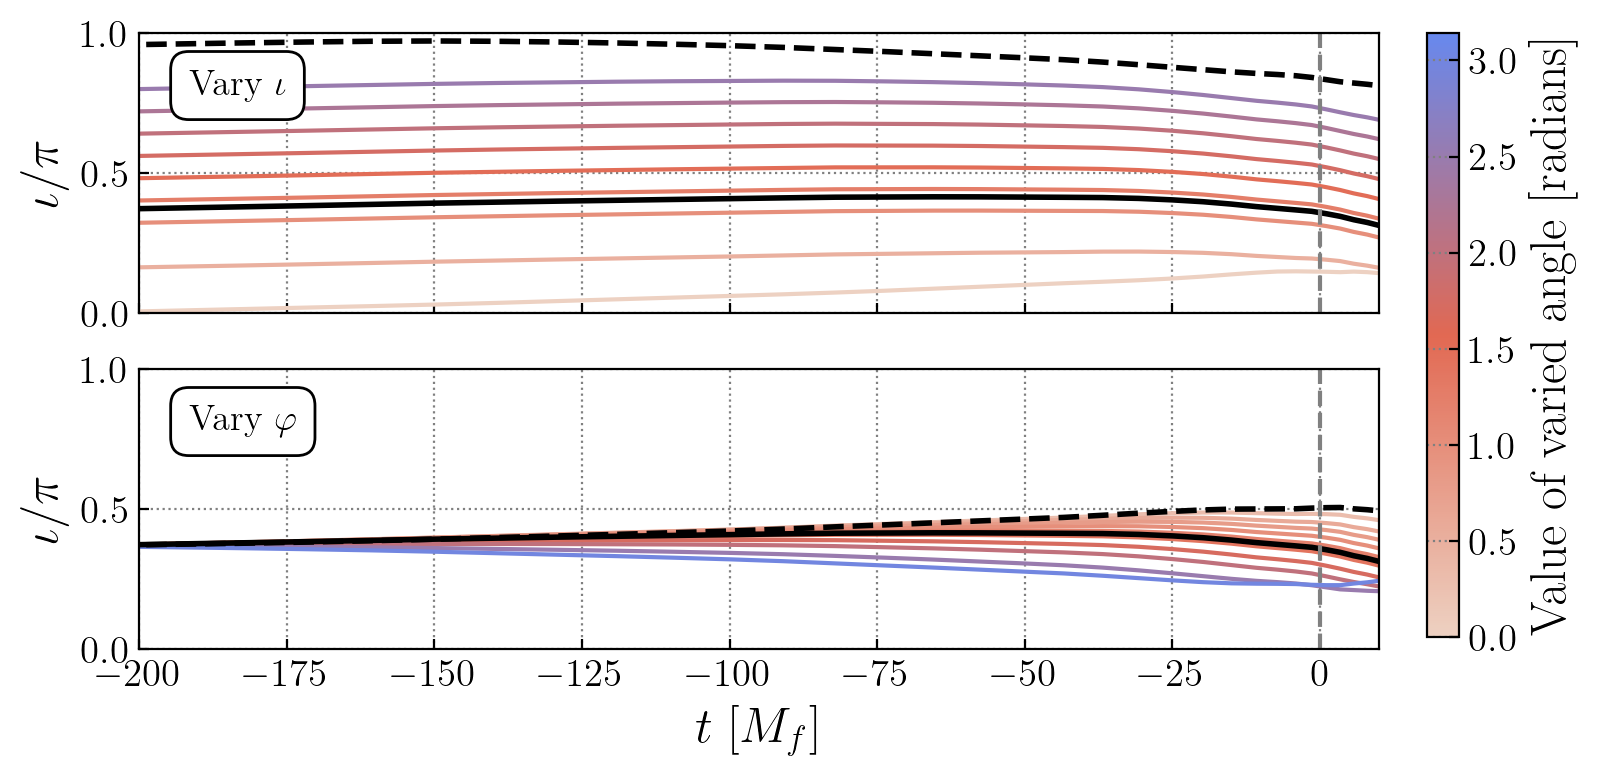

In [76]:
fig, axes = plt.subplots(2,1, figsize=(8,4), sharex=True, sharey=True)

for ii, p_name in enumerate(['iota', 'phase']):
    for p in params_to_plot[p_name]: 

        k = pf.get_key(p, p_name)
        
        if p==most_informative[p_name]:
            kws = dict(color='k', lw=2, zorder=10)
        elif p==least_informative[p_name]:
            kws = dict(color='k', lw=2, ls='--', zorder=10)
        else:
            kws = dict(color=pf.get_color(p, p_name, cmap), lw=1.5)

        times_Mf = angles_over_time_dict[k]['time_Mf']
        inc = angles_over_time_dict[k]['incl']

        axes[ii].plot(times_Mf, inc/np.pi, **kws)
        
    times_Mf = angles_over_time_dict['phase 1.3']['time_Mf']
    inc = angles_over_time_dict['phase 1.3']['incl']
    axes[ii].plot(times_Mf, inc/np.pi, color='k', lw=2)
    
    axes[ii].set_xlim(-200, 10)
    axes[ii].set_ylim(0, 1)
    axes[ii].axvline(0, ls='--', color='gray')
    axes[ii].set_ylabel('$\iota/\pi$')

    textstr = f'Vary {labels[p_name]}'
    props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=1)
    axes[ii].text(0.04, 0.87, textstr, transform=axes[ii].transAxes, fontsize=13,
            verticalalignment='top', horizontalalignment='left', bbox=props)
    
cax = plt.axes((0.93, 0.125, 0.02, 0.755)) #(left, bottom, width, height)
cnorm = matplotlib.colors.Normalize(vmin=0, vmax=np.pi)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=cnorm, cmap=cmap), cax=cax, 
             orientation='vertical', label=r'Value of varied angle [radians]')

axes[-1].set_xlabel('$t~[M_f]$')
plt.savefig('incl_vs_time.png', dpi=600, bbox_inches='tight')
plt.show()